In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Generate data
x = np.linspace(-10, 10, 500)          # 500 points for more data
y = 5 * x**2 + 10 * x - 20             # Quadratic function

# Reshape for TensorFlow
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)




2025-08-28 23:22:35.299911: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756401755.360500   77085 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756401755.380017   77085 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756401755.433440   77085 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756401755.433487   77085 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756401755.433492   77085 computation_placer.cc:177] computation placer alr

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# 2. Split dataset (shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

# 3. Build a deeper model (4 hidden layers)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# 4. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# 5. Train the model
history = model.fit(x_train, y_train, validation_split=0.1, epochs=50, batch_size=32)



Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 34913.7305 - mse: 34913.7305 - val_loss: 4778.5039 - val_mse: 4778.5039
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4198.9087 - mse: 4198.9087 - val_loss: 3431.2859 - val_mse: 3431.2859
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2846.7495 - mse: 2846.7495 - val_loss: 1350.7538 - val_mse: 1350.7538
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 925.7798 - mse: 925.7798 - val_loss: 405.5532 - val_mse: 405.5532
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 353.2200 - mse: 353.2200 - val_loss: 275.9779 - val_mse: 275.9779
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 237.7687 - mse: 237.7687 - val_loss: 201.7492 - val_mse: 201.7492
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 184.2268 - mse: 184.2268 - val_loss: 148.0959 - val_mse: 148.0959
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129.8938 - mse: 129.8938 - val_loss: 119.02

In [ ]:
# Define a tolerance for “accuracy”
tolerance = 5

# Compute approximate accuracy
accuracy = np.mean(np.abs(y_test - y_pred) <= tolerance)
print(f"Approximate accuracy within ±{tolerance}: {accuracy*100:.2f}%")

Approximate accuracy within ±5: 99.60%


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


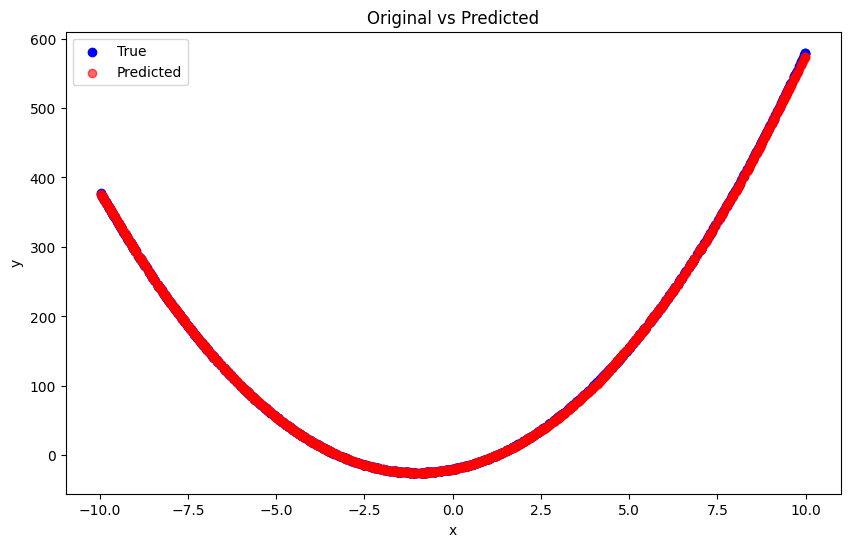

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6055 - mse: 0.6055

Test Mean Squared Error: 0.7229


In [ ]:

# 6. Predict on test data
y_pred = model.predict(x_test)

# 8. Plot original vs predicted
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, color='blue', label='True')
plt.scatter(x_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Original vs Predicted')
plt.show()

# 9. Evaluate the model
test_loss = model.evaluate(x_test, y_test)
print(f"\nTest Mean Squared Error: {test_loss[0]:.4f}")
